In [1]:
!unzip -q '/content/Train_Test_Classes.zip'

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet_v2 import ResNet152V2


from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/content/split_Background_Classes/train'
valid_path = '/content/content/split_Background_Classes/test'

# add preprocessing layer to the front of VGG
m = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in m.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/content/split_Background_Classes/train/*')

# our layers - you can add more if you want
x = Flatten()(m.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=m.input, outputs=prediction)

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = False,
                                                 seed = 21
                                                 )
print("Training set",training_set[0])
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False,
                                            seed = 21
                                           )

history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

58900480/58889256 [==============================] - 0s 0us/step
Found 354 images belonging to 9 classes.
Training set (array([[[[0.6908993 , 0.7411765 , 0.7466397 ],
         [0.6910203 , 0.7411765 , 0.74668   ],
         [0.69114137, 0.7411765 , 0.7467204 ],
         ...,
         [0.4139211 , 0.46707535, 0.46010217],
         [0.41530612, 0.46875623, 0.46187717],
         [0.41669112, 0.47043708, 0.46365216]],

        [[0.6647363 , 0.72579205, 0.72663677],
         [0.6648304 , 0.7258593 , 0.7267174 ],
         [0.66492456, 0.7259265 , 0.72679806],
         ...,
         [0.06814934, 0.04209661, 0.00862131],
         [0.06645504, 0.04072504, 0.00751867],
         [0.06476073, 0.03935346, 0.00641602]],

        [[0.69177663, 0.74079126, 0.7462834 ],
         [0.6916152 , 0.74069715, 0.7461624 ],
         [0.6914539 , 0.740603  , 0.7460414 ],
         ...,
         [0.5205852 , 0.4083542 , 0.30306366],
         [0.51889086, 0.4069826 , 0.301961  ],
         [0.5171966 , 0.405611  , 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
12/12 [==============================] - 24s 931ms/step - loss: 7.6587 - accuracy: 0.0395 - val_loss: 4.0747 - val_accuracy: 0.3253
Epoch 2/10
12/12 [==============================] - 8s 707ms/step - loss: 4.1474 - accuracy: 0.1243 - val_loss: 1.9390 - val_accuracy: 0.5542
Epoch 3/10
12/12 [==============================] - 8s 678ms/step - loss: 1.3673 - accuracy: 0.6158 - val_loss: 1.8198 - val_accuracy: 0.4699
Epoch 4/10
12/12 [==============================] - 8s 717ms/step - loss: 1.9689 - accuracy: 0.5000 - val_loss: 1.4694 - val_accuracy: 0.5422
Epoch 5/10
12/12 [==============================] - 8s 661ms/step - loss: 1.5159 - accuracy: 0.5706 - val_loss: 0.9699 - val_accuracy: 0.6386
Epoch 6/10
12/12 [==============================] - 8s 669ms/step - loss: 1.1237 - accuracy: 0.6836 - val_loss: 0.9585 - val_accuracy: 0.6747
Epoch 7/10
12/12 [==============================] - 8s 663ms/step - loss: 0.4817 - accuracy: 0.8192 - val_loss: 0.5722 - val_accuracy: 0.7952
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Confusion matrix, without normalization

Classification Report
                          precision    recall  f1-score   support

     Building with bench       0.78      0.88      0.82         8
       Glass door-window       0.73      0.92      0.81        12
Only building (standing)       0.67      0.25      0.36         8
                    Snow       1.00      1.00      1.00         8
                  Stairs       0.92      1.00      0.96        11
                   beach       0.83      1.00      0.91        10
                  garden       0.90      1.00      0.95         9
             green space       1.00      0.78      0.88         9
                    wall       0.86      0.75      0.80         8

                accuracy                           0.86        83
               macro avg       0.85      0.84      0.83        83
            weighted avg       0.85      0.86      0.84        83



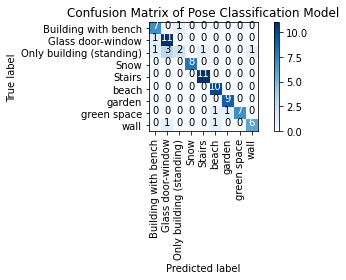

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """Plots the confusion matrix."""
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

Y_pred = model.predict_generator(test_set,len(test_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
target_names = list(training_set.class_indices.keys())
#print()
plot_confusion_matrix(cm,
                      target_names,
                      title ='Confusion Matrix of Pose Classification Model')
print('\nClassification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))

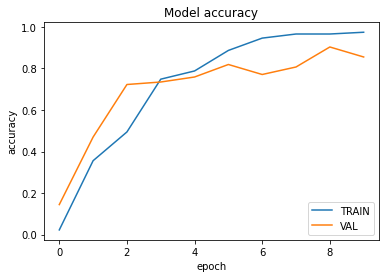

In [ ]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()